In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load data
df = pd.read_csv('pola_tidur_mahasiswa.csv')

# Standarisasi fitur
X = df[['Jam Tidur', 'Durasi Tidur', 'Kualitas Tidur']]
scaler = StandardScaler()


X


In [23]:
X_scaled = scaler.fit_transform(X)

print(X_scaled)

[[ 0.53170314  0.98680238  1.41608227]
 [-0.182361    1.77338399  0.88364045]
 [ 0.69648718 -1.51595728 -0.02151065]
 ...
 [-0.23728901  0.70077271  1.20310554]
 [-1.00628116 -0.65786825  0.99012881]
 [-1.55556126  0.62926529  0.56417536]]


In [14]:
# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


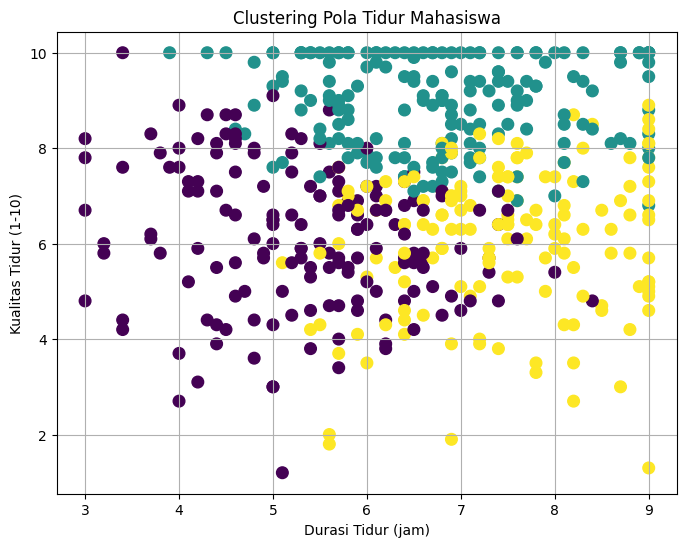

In [16]:
# Visualisasi (2D)
plt.figure(figsize=(8,6))
plt.scatter(df['Durasi Tidur'], df['Kualitas Tidur'], c=df['Cluster'], cmap='viridis', s=70)
plt.xlabel('Durasi Tidur (jam)')
plt.ylabel('Kualitas Tidur (1-10)')
plt.title('Clustering Pola Tidur Mahasiswa')
plt.grid(True)
plt.show()
